In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from matplotlib import cm
from matplotlib.ticker import LinearLocator


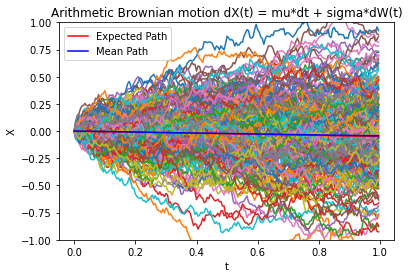

In [10]:
#Monte Carlo simulation of arithmetic Brownian motion
# dX[t]=mu*dt + sigma*dW[t]

#Define parameters and time grid
npaths=20000 #number of paths
T=1 #time horizon
nsteps=200 #number of time steps
dt=T/nsteps #time step
t=np.arange(0,T,dt) #observation paths
#mu,sigma=0.12,0.4 #model parameters
mu,sigma=-0.05, 0.4 #model parameters

#Monte Carlo

#Compute the increments with Euler-Maruyama
dX=mu*dt + sigma *np.random.randn(npaths,nsteps)*np.sqrt(dt)
dX=np.insert(dX,0,0,axis=1)
dX=np.delete(dX,-1,axis=1)

#Accumulate the increments
X=np.cumsum(dX,axis=1)

#Expcted, mean and sample path
plt.figure(1)
EX=mu*t #expected path
D=sigma**2/2

df = pd.concat([pd.Series(x) for x in X], axis=1)
df.index=t 
mean_per_step=list(df.apply(lambda row: np.mean(row),axis=1))

for j in range(nsteps):
    plt.plot(t,X[j])
plt.plot(t,EX,color='r',label='Expected Path')
plt.plot(t,mean_per_step,color='b',label='Mean Path')
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([-1,1])
plt.title('Arithmetic Brownian motion dX(t) = mu*dt + sigma*dW(t)')
plt.legend()
plt.show()


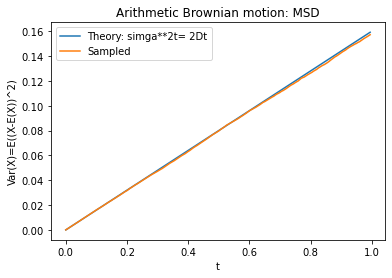

In [3]:
#Variance= mean square deviation = mean square displacement of the random part
plt.figure(2)
var_per_step=list(df.apply(lambda row: np.var(row),axis=1))
plt.plot(t,sigma**2*t,t,var_per_step)
plt.legend(['Theory: simga**2t= 2Dt','Sampled'])
plt.xlabel('t')
plt.ylabel('Var(X)=E((X-E(X))^2)')
plt.title('Arithmetic Brownian motion: MSD')
plt.show()

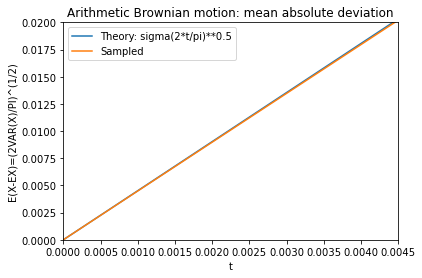

In [4]:
#Mean absolute deviation
plt.figure(3)
full_EX=[EX]*npaths
abs_diff_to_x=abs(X-EX)
df2=pd.concat([pd.Series(x) for x in abs_diff_to_x], axis=1)
df2.index=t
mean_per_step=list(df2.apply(lambda row: np.mean(row),axis=1))
plt.plot(t,sigma*np.sqrt(2*t/np.pi),t,mean_per_step)
plt.legend(['Theory: sigma(2*t/pi)**0.5','Sampled'])
plt.ylim([0,0.02])
plt.xlim([0,0.0045])
plt.xlabel('t')
plt.ylabel('E(X-EX)=(2VAR(X)/PI)^(1/2)')
plt.title('Arithmetic Brownian motion: mean absolute deviation')
plt.show()
    

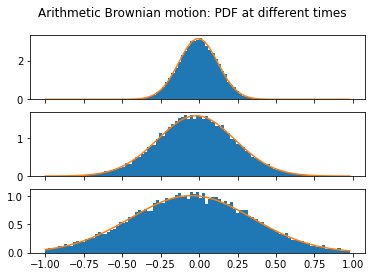

In [5]:
#Probability density function at different times
x=np.arange(-1,1,0.02)
fig, axs = plt.subplots(3,sharex=True)
fig.suptitle('Arithmetic Brownian motion: PDF at different times')
axs[0].hist(X[:,20],bins=x,density=True)
axs[0].plot(x,norm.pdf(x,loc=np.mean(X[:,20]),scale=np.std(X[:,20])))
axs[1].hist(X[:,80],bins=x,density=True)
axs[1].plot(x,norm.pdf(x,loc=np.mean(X[:,80]),scale=np.std(X[:,80])))
axs[2].hist(X[:,-1],bins=x,density=True)
axs[2].plot(x,norm.pdf(x,loc=np.mean(X[:,-1]),scale=np.std(X[:,-1])))

<Figure size 432x288 with 0 Axes>

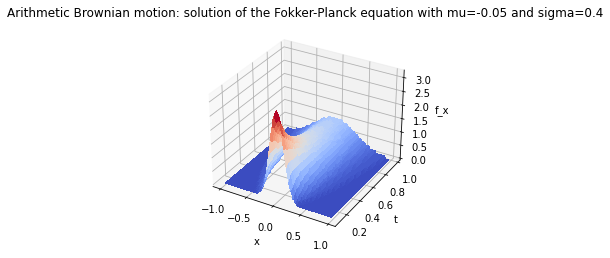

In [12]:
#Solution of the Fokker-Planck equation
plt.figure(5)
D=sigma**2/2 #diffusion coefficient
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x2=np.arange(-1,1,0.02)
t2=np.arange(0.1,1,0.025)
x2, t2 = np.meshgrid(x2, t2,sparse=False)
f2=np.round((1/(2*np.sqrt(np.pi*D*t2)))*np.exp(-(x2-mu*t2)**2/(4*D*t2)),1)

surf=ax.plot_surface(x2,t2,f2,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('f_x')
ax.set_title('Arithmetic Brownian motion: solution of the Fokker-Planck equation with mu={} and sigma={}'.format(mu,sigma))
plt.show()